<a href="https://colab.research.google.com/github/JongwonLee-BOK/ITM-ML/blob/main/final_Bat1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Minseo Park
KAIST @ 2023 Fall Class  

### Regression 실습 : 집값 예측하기
- 미국 매사추세츠주의 주택 가격 데이터(Boston Housing 1970)를 활용해 지역의 평균 주택 가격을 예측하는 선형 회귀 모델을 학습한다.
- 이를 기초로 하여 주택 가격의 영향 요소 파악 및 주택 가격 예측을 진행할 수 있다.

    1. Library & Data Import
    2. 데이터 파악 (EDA: 탐색적 데이터 분석)
        2-1. 데이터셋 기본 정보 파악
        2-2. 종속 변수(목표 변수) 탐색
        2-3. 설명 변수 탐색
        2-4. 설명변수와 종속변수 간의 관계 탐색
    3. 주택 가격 예측 모델링: 회귀 분석
        3-1. 데이터 전처리
        3-2. 회귀 모델링
        3-3. 모델 해석
        3-4. 모델 예측 결과 및 성능 평가

### 1. Import Libraries & Data Set

In [ ]:
import pandas as pd ### 데이터 분석을 하기 위한 파이썬 라이브러리 such as a table
import numpy as np ### 수치해석 라이브러리
import matplotlib.pyplot as plt ### 그래프 그리는 라이브러리
import seaborn as sns ### 그래프 그리는 라이브러리
%matplotlib inline
### 출력을 jupyter lab으로

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

##### Import Boston Housing Dataset

- 분석에 사용될 데이터셋은 Boston Housing 데이터의 일부 변수를 추출한 데이터입니다.
- 미국 매사추세츠주 92개 도시(TOWN)의 506개 지역의 주택 가격 및 기타 지역 특성 데이터가 포함되어 있습니다. (Dataset Introduction)

아래 두 코드를 통해 코랩에서 불러오는 법 썼음.

In [ ]:
from google.colab import files

# 파일 업로드 대화 상자 표시
uploaded = files.upload()


Saving Bat1.csv to Bat1.csv


In [ ]:
import pandas as pd

# 업로드한 파일명을 사용하여 데이터프레임을 생성
file_name = "Bat1.csv"  # 업로드한 파일명에 맞게 수정
df = pd.read_csv(file_name)

# 데이터프레임 내용 확인
print(df.head())


    playerID  candidate       avg       obp       slp       ops  so_percent  \
0  aaronha01          1  0.304998  0.377229  0.554513  0.931742    0.111857   
1  aaronto01          0  0.228814  0.293204  0.327331  0.620534    0.153602   
2   abadan01          0  0.095238  0.240000  0.095238  0.335238    0.238095   
3  abbotje01          0  0.263423  0.310832  0.416107  0.726939    0.152685   
4  abbotku01          0  0.255871  0.306746  0.422701  0.729446    0.279354   

      G     AB     R  ...  Hutch_Award  Roberto_Clemente_Award  NLCS_MVP  \
0  3298  12364  2174  ...            0                       0         0   
1   437    944   102  ...            0                       0         0   
2    15     21     1  ...            0                       0         0   
3   233    596    82  ...            0                       0         0   
4   702   2044   273  ...            0                       0         0   

   ALCS_MVP  Silver_Slugger  Hank_Aaron_Award  birthCountry_USA  bat

In [ ]:
이건 주피터 랩에서 파일 불러올 때 사용하는 코드니 실행 x
df=pd.read_csv("./BostonHouse/BostonHousing2.csv")  ### .은 현재 디렉토리를 의미

### 2. EDA (Exploratory Data Analysis)

In [ ]:
#데이터셋을 불러와서 첫 세 줄을 출력하여 데이터의 구성을 한 번 살펴볼게요.
df.head(3)
#df.tail(3)

,playerID,candidate,avg,obp,slp,ops,so_percent,G,AB,R,...,Hutch_Award,Roberto_Clemente_Award,NLCS_MVP,ALCS_MVP,Silver_Slugger,Hank_Aaron_Award,birthCountry_USA,bats_L,throws_L,duration
0,aaronha01,1,0.304998,0.377229,0.554513,0.931742,0.111857,3298,12364,2174,...,0,0,0,0,0,0,1,0,0,22.478217
1,aaronto01,0,0.228814,0.293204,0.327331,0.620534,0.153602,437,944,102,...,0,0,0,0,0,0,1,0,0,9.464945
2,abadan01,0,0.095238,0.240000,0.095238,0.335238,0.238095,15,21,1,...,0,0,0,0,0,0,1,1,1,4.591470


#### 2-1 : 데이터 셋 기본 정보 파악
- Features Descriptions

    1. TOWN: 소속 도시 이름
    2. LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
    3. CMEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing)(단위 USD 1000)
    4. CRIM: 지역 범죄율 (per capita crime)
    5. ZN: 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율
    6. INDUS: 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적
    7. CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
    8. NOX: 소속 도시의 산화질소 농도
    9. RM: 해당 지역의 자택당 평균 방 갯수
    10. AGE: 해당 지역에 1940년 이전에 건설된 주택의 비율
    11. DIS: 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여
    12. RAD: 소속 도시가 Radial 고속도로와의 접근성 지수
    13. TAX: 소속 도시의 10000달러당 재산세
    14. PTRATIO: 소속 도시의 학생-교사 비율
    15. B: 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비
    16. LSTAT: 해당 지역의 빈곤층 비율


- 데이터의 각 변수(features, attributes, columns, x들)의 기본 정보 및 각 변수의 특성을 살펴보겠습니다.

In [ ]:
### 그래프의 배경 설정 : sns --> seaborn 라이브러리 이용
sns.set_style('darkgrid')

- 데이터 셋의 기본 정보 파악하기

In [ ]:
### 데이터 셋 구조 보기
df.shape
### 해석: 행이 506, 집이 506개, 열이 17, 집값을 예측하는데 사용한 변수가 17개라고 생각하시면 됩니다.

(6589, 54)

In [ ]:
### 결측치 : 비어있는 데이터를 찾습니다.
### 여기서는 어떤 컬럼(변수, 특성, x)에 결측치가 많은지 봅니다.
df.isnull().sum()

playerID                     0
candidate                    0
avg                          0
obp                          0
slp                          0
ops                          0
so_percent                   0
G                            0
AB                           0
R                            0
H                            0
HR                           0
RBI                          0
SB                           0
BB                           0
W_team                       0
L_team                       0
W_team_percent               0
Div_w                        0
Lg_w                         0
WS_w                         0
avg_post                     0
obp_post                     0
slp_post                     0
ops_post                     0
so_percent_post              0
G_post                       0
AB_post                      0
R_post                       0
H_post                       0
HR_post                      0
RBI_post                     0
SB_post 

In [ ]:
#### 해석) 다행입니다. 506개의 관측치(observations, 집들)에서, 17개의 변수(variable, features, columns, x)에 결측치가 없습니다.
### 만약 결측치가 있다면, 결측치를 처리해야 됩니다. 이것을 전처리라고 합니다.

In [ ]:
### data type을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   playerID                   6589 non-null   object 
 1   candidate                  6589 non-null   int64  
 2   avg                        6589 non-null   float64
 3   obp                        6589 non-null   float64
 4   slp                        6589 non-null   float64
 5   ops                        6589 non-null   float64
 6   so_percent                 6589 non-null   float64
 7   G                          6589 non-null   int64  
 8   AB                         6589 non-null   int64  
 9   R                          6589 non-null   int64  
 10  H                          6589 non-null   int64  
 11  HR                         6589 non-null   int64  
 12  RBI                        6589 non-null   int64  
 13  SB                         6589 non-null   int64

In [ ]:
### 해셕)Town(소속도시이름)만 문자형 변수(범주형 변수)이고, 이를 제외한 모든 변수는 숫자형입니다.

In [ ]:
### 슷지형 변수만 뽑아서 기본 통계를 해 봅니다.
df.describe()

,candidate,avg,obp,slp,ops,so_percent,G,AB,R,H,...,Hutch_Award,Roberto_Clemente_Award,NLCS_MVP,ALCS_MVP,Silver_Slugger,Hank_Aaron_Award,birthCountry_USA,bats_L,throws_L,duration
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,...,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,0.099863,0.228676,0.293509,0.327867,0.621376,0.181091,463.863864,1457.756412,194.155259,388.707391,...,0.004705,0.004857,0.002884,0.002884,0.074063,0.003187,0.862195,0.400061,0.140689,5.729085
std,0.299841,0.087558,0.098272,0.140249,0.225100,0.124652,597.700742,2098.901723,308.792706,588.858508,...,0.068435,0.069525,0.056385,0.053626,0.550688,0.082586,0.344722,0.489948,0.347727,5.224403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002738
25%,0.000000,0.208609,0.269896,0.278689,0.555027,0.105951,29.000000,56.000000,6.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.034929
50%,0.000000,0.243792,0.308612,0.343517,0.652858,0.160912,176.000000,423.000000,47.000000,101.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.462788
75%,0.000000,0.266667,0.336232,0.397112,0.729850,0.228600,711.000000,2057.000000,248.000000,524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.366380
max,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3562.000000,14053.000000,2295.000000,4256.000000,...,1.000000,1.000000,2.000000,1.000000,12.000000,4.000000,1.000000,1.000000,1.000000,31.466765


#### 2-2 종속변수(타겟변수, y)의 탐색

    - CMEDV : 주택가격이 타겟변수가 됩니다. 왜냐면, 저희는 주택의 가격을 맞추기 위하이기 때문입니다.
    - matplot 참고 사이트:
        - https://codetorial.net/matplotlib/basic_plot.html
        - https://matplotlib.org/stable/gallery/index.html

In [ ]:
### 기초 통계량을 다시 살펴봅니다.
df['candidate'].describe()

count    6589.000000
mean        0.099863
std         0.299841
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: candidate, dtype: float64

<Axes: >

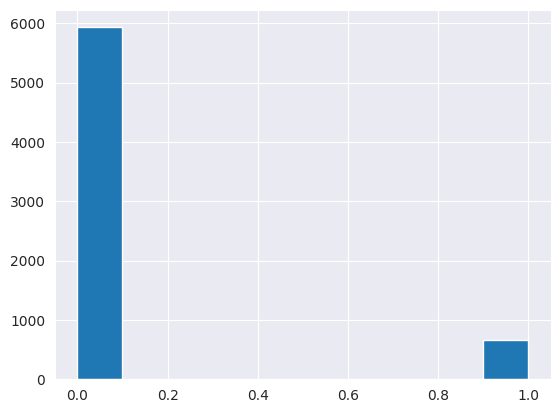

In [ ]:
### 시각화를 해서 살펴봅니다.
### 데이터의 분포를 파악할때, 시각화각 가장 좋은 방법 중 한개 입니다.
### .hist(): 히스토그램을 의미합니다. bins=50:주머니가 50개 이다. x가 50개로 나누어 진다라고 이해하셔도 좋습니다.
### y축은 frequency 빈도수입니다. x 축은 실제 주택 값입니다.
## $50,000 근처의 집도 16~17개는 된다??

df['candidate'].hist()

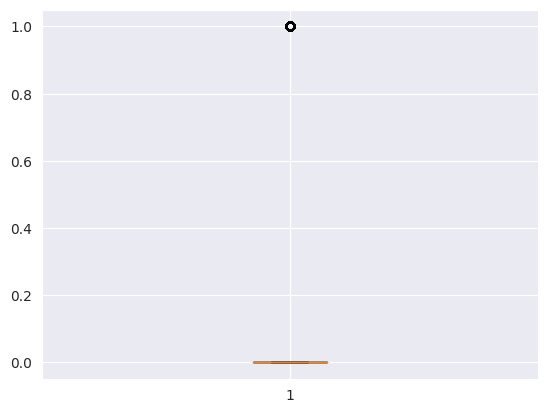

In [ ]:
### 분포를 보는 또 다른 시각화 방법이 있습니다. 여러가지로 찍어 보겠습니다.
### 첫번째 :boxplot 입니다.

plt.boxplot(df['candidate'])
plt.show()

In [ ]:
### 해석) $17,000~$25000 사이에 분포되어 있고, $40,000 이상인 고가 주택도 존재합니다.

<ipython-input-13-583b83010d9a>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


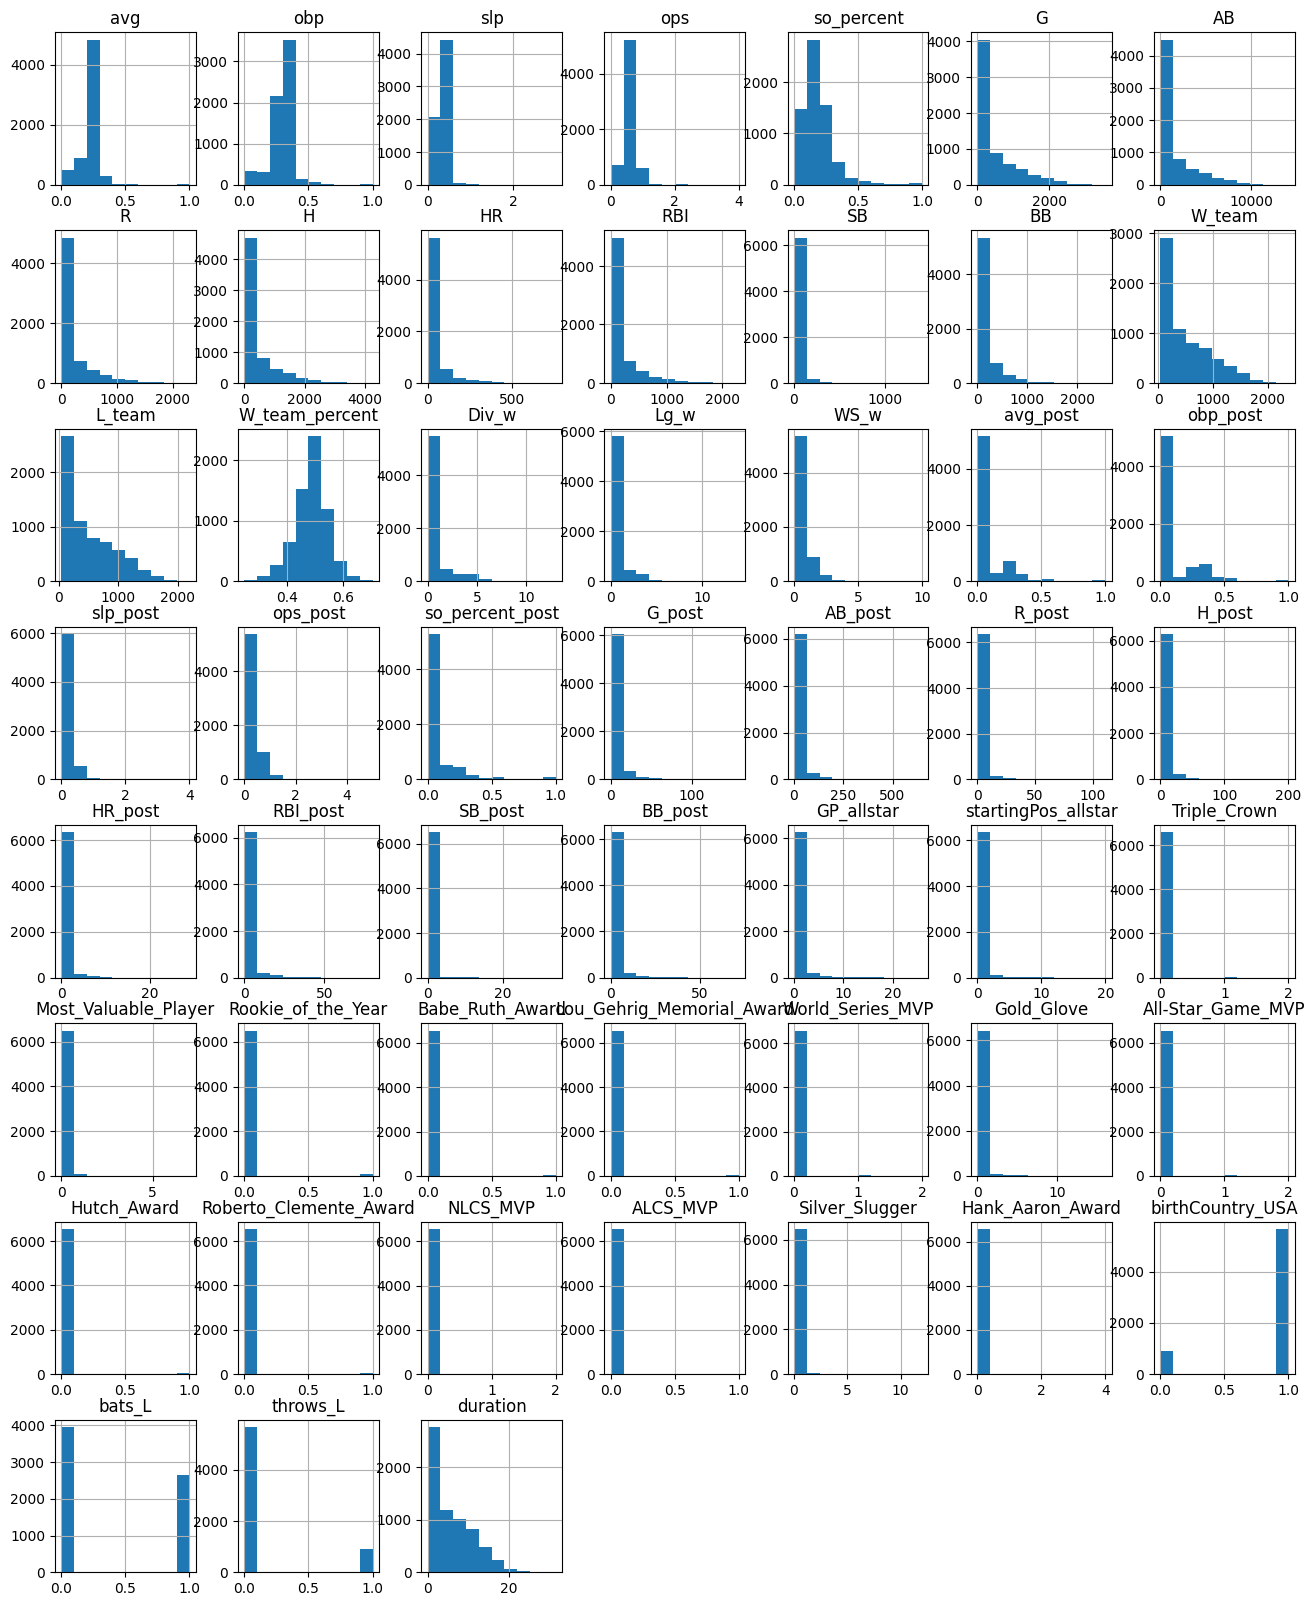

In [ ]:
### numerical features(except "LON" & "LAT") :  LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
numerical_columns=['avg', 'obp', 'slp', 'ops', 'so_percent', 'G', 'AB', 'R', 'H', 'HR', 'RBI', 'SB', 'BB', 'W_team', 'L_team', 'W_team_percent', 'Div_w', 'Lg_w', 'WS_w', 'avg_post', 'obp_post', 'slp_post', 'ops_post', 'so_percent_post', 'G_post', 'AB_post', 'R_post', 'H_post', 'HR_post', 'RBI_post', 'SB_post', 'BB_post', 'GP_allstar', 'startingPos_allstar', 'Triple_Crown', 'Most_Valuable_Player', 'Rookie_of_the_Year', 'Babe_Ruth_Award', 'Lou_Gehrig_Memorial_Award', 'World_Series_MVP', 'Gold_Glove', 'All-Star_Game_MVP', 'Hutch_Award', 'Roberto_Clemente_Award', 'NLCS_MVP', 'ALCS_MVP', 'Silver_Slugger', 'Hank_Aaron_Award', 'birthCountry_USA', 'bats_L', 'throws_L', 'duration']

### figsize()는 plot()의 기본 크기를 지정합니다.
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

### gca()
### gca()로 현재의 Axes를 할당한다.
### ax=plt.gica(): 축의 위치를 호출하여 ax로 설정(축 위치 변경을 위해 필요한 과정)

df[numerical_columns].hist(ax=ax)
plt.show()

#### 2-3 설명변수(독립변수, features, attributes, x) 살펴보기

In [ ]:
## AttributeError: 'SubplotSpec' object has no attribute 'is_first_col'

In [ ]:
## ! pip install --upgrade matplotlib
# 주피터 노트북에서는 느낌표 붙여야 함

<ipython-input-136-f9fc56681f6c>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


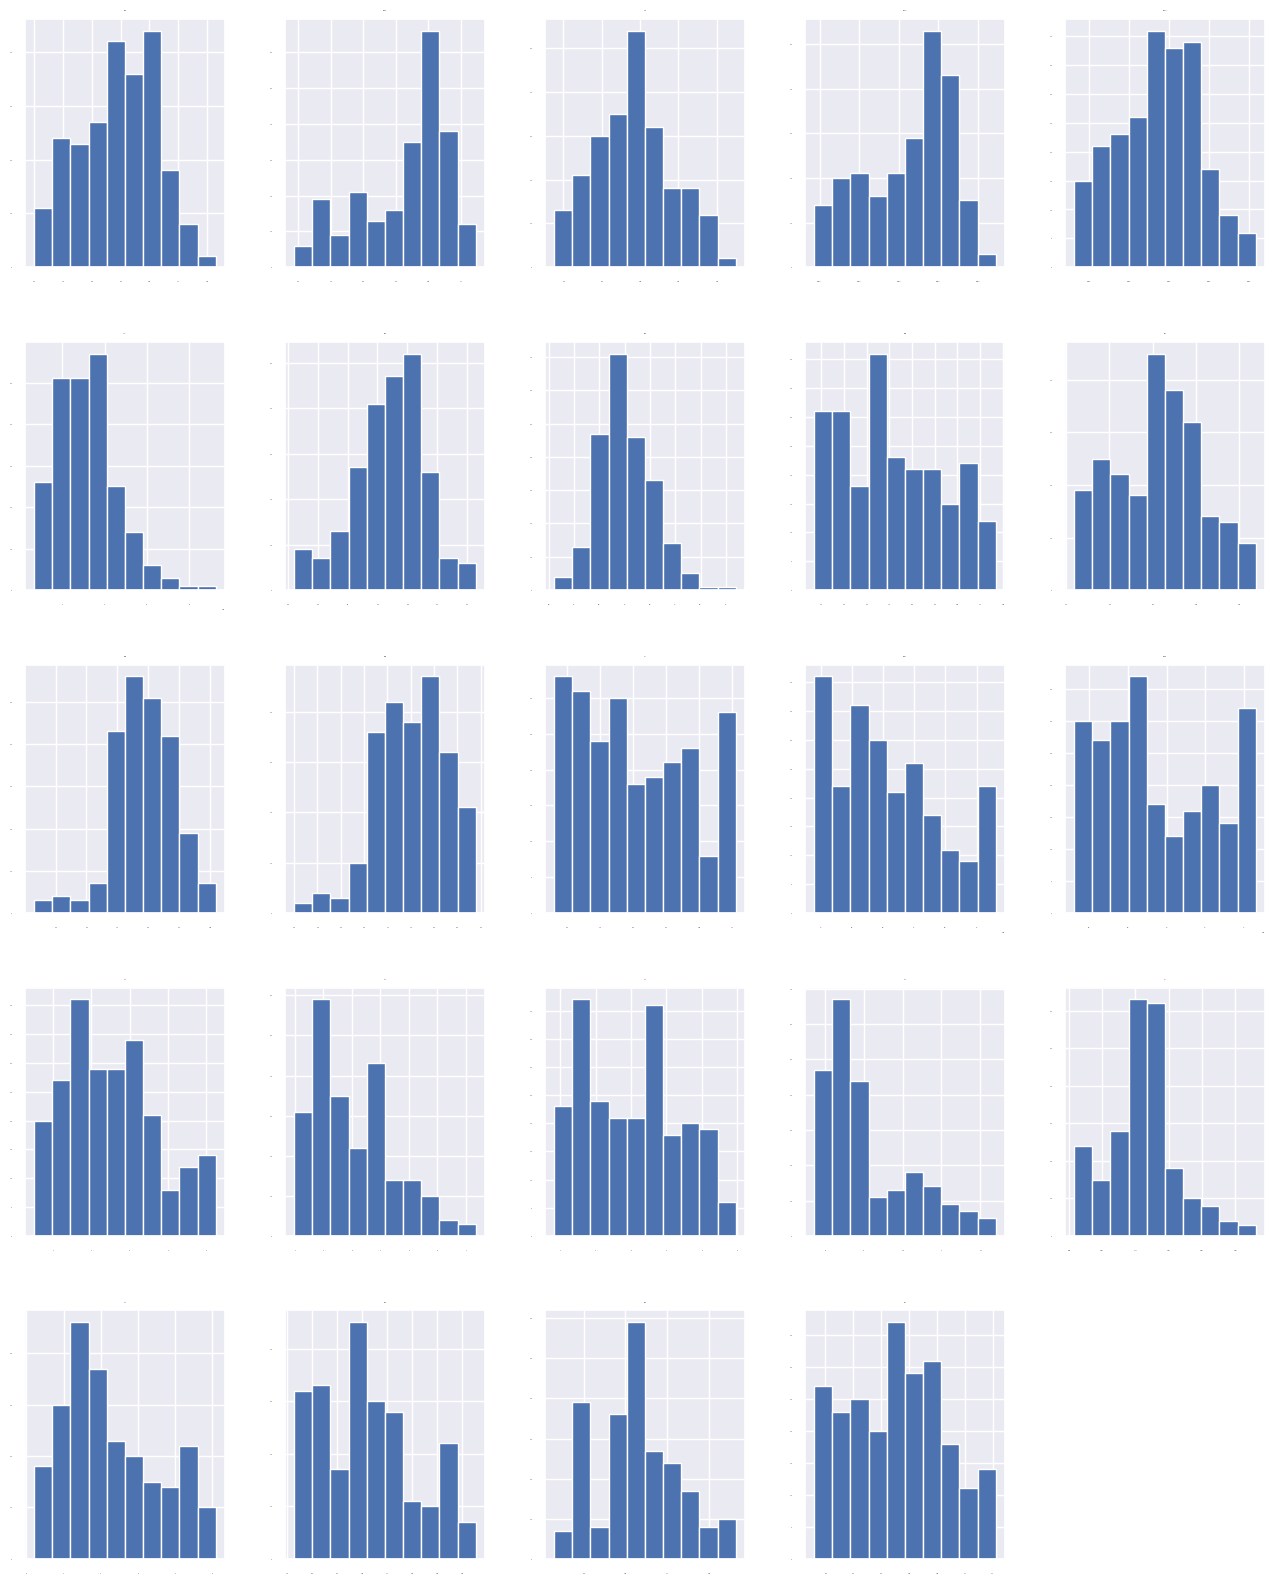

In [ ]:
### numerical features(except "LON" & "LAT") :  LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
numerical_columns=['inda', 'mana', 'inva', 'exima', 'eximb', 'conc', 'laba', 'labb', 'sala', 'salc', 'bsia', 'bsie', 'clia', 'monc', 'mong', 'inta', 'intb', 'intd', 'inth', 'intj', 'intn', 'ppia', 'ppib', 'ppic']

### figsize()는 plot()의 기본 크기를 지정합니다.]
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

### gca()
### gca()로 현재의 Axes를 할당한다.
### ax=plt.gica(): 축의 위치를 호출하여 ax로 설정(축 위치 변경을 위해 필요한 과정)

df[numerical_columns].hist(ax=ax)
plt.show()

#### 2-4. 설명변수(x) 와 종속변수(y) 간의 관계 탐색
- 변수간의 상관관계 파악해 봅니다.

In [ ]:
### Person 상관계수 : 대표적으로 상관관계 분석시 사용하는 지표입니다.
### -1 에서 1 사이의 값을 가진다는 특징이 있습니다.
### 1일 때는 완전 양의 상관(perfect positive correlation), -1일 때는 완전 음의 상관관계(perfect negative correlation)관계를 보입니다.
### https://m.blog.naver.com/istech7/50153047118

cols = ['candidate', 'avg', 'obp', 'slp', 'ops', 'so_percent', 'G', 'AB', 'R', 'H', 'HR', 'RBI', 'SB', 'BB', 'W_team', 'L_team', 'W_team_percent', 'Div_w', 'Lg_w', 'WS_w', 'avg_post', 'obp_post', 'slp_post', 'ops_post', 'so_percent_post', 'G_post', 'AB_post', 'R_post', 'H_post', 'HR_post', 'RBI_post', 'SB_post', 'BB_post', 'GP_allstar', 'startingPos_allstar', 'Triple_Crown', 'Most_Valuable_Player', 'Rookie_of_the_Year', 'Babe_Ruth_Award', 'Lou_Gehrig_Memorial_Award', 'World_Series_MVP', 'Gold_Glove', 'All-Star_Game_MVP', 'Hutch_Award', 'Roberto_Clemente_Award', 'NLCS_MVP', 'ALCS_MVP', 'Silver_Slugger', 'Hank_Aaron_Award', 'birthCountry_USA', 'bats_L', 'throws_L', 'duration']
corr = df[cols].corr(method = 'pearson')
corr

,candidate,avg,obp,slp,ops,so_percent,G,AB,R,H,...,Hutch_Award,Roberto_Clemente_Award,NLCS_MVP,ALCS_MVP,Silver_Slugger,Hank_Aaron_Award,birthCountry_USA,bats_L,throws_L,duration
candidate,1.000000,0.178600,0.187602,0.238326,0.230391,-0.110384,0.701389,0.727089,0.739968,0.736239,...,0.154636,0.202455,0.108660,0.123692,0.365202,0.115872,-0.000476,0.014218,0.013724,0.574988
avg,0.178600,1.000000,0.862939,0.873740,0.921119,-0.306289,0.310166,0.301243,0.292602,0.304422,...,0.041459,0.044160,0.025570,0.032260,0.086261,0.027619,-0.018797,0.033376,0.016340,0.316277
obp,0.187602,0.862939,1.000000,0.774273,0.918982,-0.249139,0.315482,0.302654,0.304517,0.303600,...,0.045453,0.048706,0.023038,0.031878,0.094720,0.037757,0.014267,0.073947,0.034676,0.320663
slp,0.238326,0.873740,0.774273,1.000000,0.961076,-0.189348,0.381655,0.371786,0.372077,0.371712,...,0.057941,0.065569,0.036560,0.045920,0.144275,0.057459,-0.022828,0.035696,0.036483,0.380135
ops,0.230391,0.921119,0.918982,0.961076,1.000000,-0.226740,0.375521,0.363771,0.364766,0.364139,...,0.055943,0.062116,0.032836,0.042527,0.131243,0.052284,-0.007994,0.054524,0.037869,0.376835
so_percent,-0.110384,-0.306289,-0.249139,-0.189348,-0.226740,1.000000,-0.198179,-0.196703,-0.177366,-0.201010,...,-0.015533,-0.014518,-0.006317,-0.012291,-0.015181,0.007058,-0.041879,-0.016661,0.012951,-0.200431
G,0.701389,0.310166,0.315482,0.381655,0.375521,-0.198179,1.000000,0.989311,0.961188,0.979202,...,0.179057,0.222385,0.113242,0.140101,0.372632,0.124654,-0.013734,0.063877,0.018050,0.890689
AB,0.727089,0.301243,0.302654,0.371786,0.363771,-0.196703,0.989311,1.000000,0.980562,0.995804,...,0.188171,0.240977,0.116949,0.150143,0.401621,0.133472,-0.013892,0.048781,0.011179,0.851869
R,0.739968,0.292602,0.304517,0.372077,0.364766,-0.177366,0.961188,0.980562,1.000000,0.986322,...,0.195505,0.256603,0.107196,0.158628,0.443538,0.174051,-0.005556,0.065256,0.027688,0.810451
H,0.736239,0.304422,0.303600,0.371712,0.364139,-0.201010,0.979202,0.995804,0.986322,1.000000,...,0.194533,0.248675,0.116227,0.152424,0.417035,0.142011,-0.012665,0.054492,0.018937,0.835151


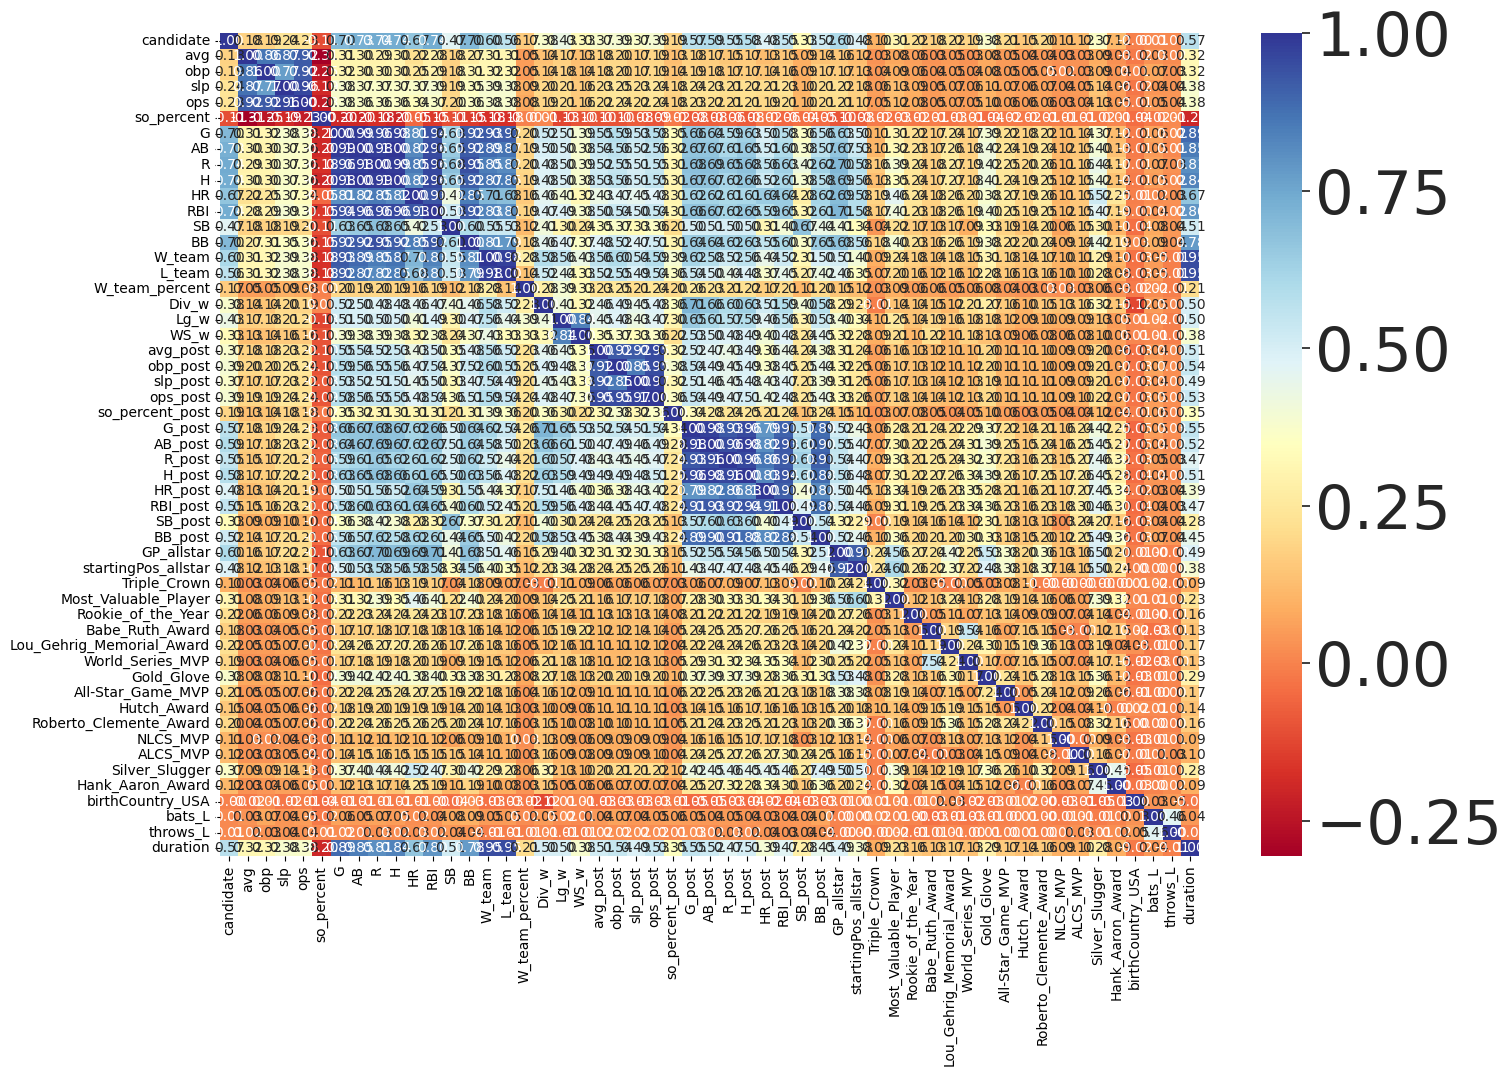

In [ ]:
### 상관관계를 직관적으로 살펴보기 위해 Heatmap 으로 돌려봅니다.
### heatmap (seaborn): 여기서는 seaborn 시각화 라이브러리를 사용해서 표현합니다.
### 시각화의 대표적인 라이브러리가 matplot(https://matplotlib.org/)과 seaborn(https://seaborn.pydata.org/)이 있습니다.

fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.set(font_scale = 4.0)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':10},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

In [ ]:
### 해설)
### 우리의 관심사인 target variable **“CMEDV - 주택 가격”**과 다른 변수간의 상관관계를 살펴보면,
### “CMEDV - 주택 가격”
### “RM - 자택당 평균 방 갯수”(0.7) (양의 상관관계)
### “LSTAT - 빈곤층의 비율”(-0.74) (음의 상관관게)
## 과 강한 상관관계를 보이고 있다는 것을 알 수 있습니다.

##### 2.4.1 CMEDV - 주택 가격~ 방 갯수("RM")의 관계

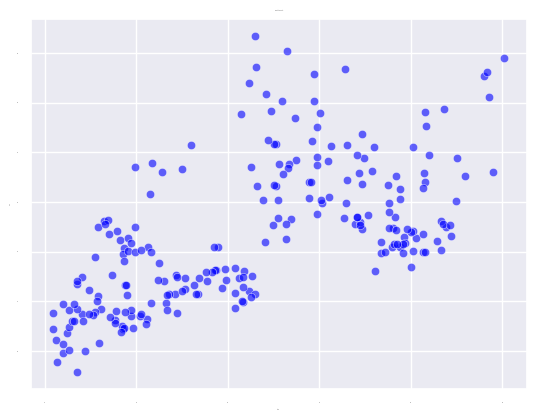

In [ ]:
### scatter plot 산점도, https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x='inte', y='cpi', markers='o', color='blue', alpha=0.6)
sns.set(font_scale = 0.05)
plt.title('Scatter Plot')
plt.show()

In [ ]:
### 해설)
### 주택 가격이 방 갯수와 양의 상관관계(positive correlation)를 갖고 있습니다.
### 즉, 방 갯수가 많은 주택들이 상대적으로 더 높은 가격을 갖고 있습니다.

##### 2.4.2 CMEDV - 빈곤층의 비율(“LSTAT”)의 관계

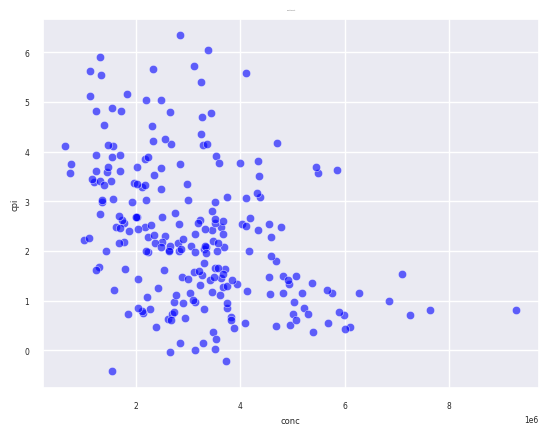

In [ ]:
# scatter plot
sns.scatterplot(data=df, x='conc', y='cpi', markers='o', color='blue', alpha=0.6)
sns.set(font_scale = 0.05)
plt.title('Scatter Plot')
plt.show()

In [ ]:
### 해설)
### 주택 가격이 빈곤층의 비율과 음의 상관관계(negative correlation)를 갖고 있습니다.
### 즉, 빈곤층의 비율이 높은 지역의 주택 가격이 상대적으로 낮은 경향이 있습니다.

##### 2.4.3 도시별 차이 탐색
- 데이터를 살펴보면 여러 지역이 같은 도시에 속한 경우가 있습니다.
- 변수 중에서도 도시 단위로 측정되는 변수가 많고요. 따라서 우리는 자연스럽게 도시 간의 차이를 궁금하게 됩니다.
- 다시한번 변수의 설명을 열거해 봅니다.

1. TOWN: 소속 도시 이름
2. LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
3. CMEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing)(단위: USD 1000)
4. CRIM: 지역 범죄율 (per capita crime)
5. ZN: 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율
6. INDUS: 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적
7. CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
8. NOX: 소속 도시의 산화질소 농도
9. RM: 해당 지역의 자택당 평균 방 갯수
10. AGE: 해당 지역에 1940년 이전에 건설된 주택의 비율
11. DIS: 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여
12. RAD: 소속 도시가 Radial 고속도로와의 접근성 지수
13. TAX: 소속 도시의 10000달러당 재산세
14. PTRATIO: 소속 도시의 학생-교사 비율
15. B: 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비
16. LSTAT: 해당 지역의 빈곤층 비율

In [ ]:
### 각 도시 데이터 갯수 살펴보기
df['cpi'].value_counts()

3.3951    1
1.8063    1
0.7397    1
0.3692    1
0.4873    1
         ..
2.9887    1
3.0337    1
3.4411    1
3.9393    1
2.2623    1
Name: cpi, Length: 235, dtype: int64

In [ ]:
### 해설) 도시 갯수가 92개 입니다.

<Axes: >

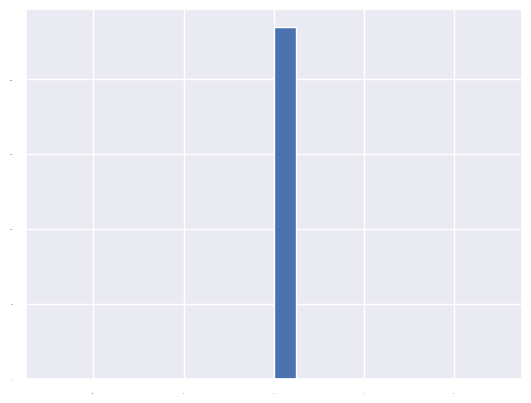

In [ ]:
### 각 도시 데이터 갯수 살펴보기 (bar plot)을 활용해서 시각화를 합니다.
### 위의 각 도시 데이터 갯수를 x 축으로, 합니다.
### x 축을 50개로 나누었습니다.

df['cpi'].value_counts().hist(bins=20)

In [ ]:
### 도시별 주택 가격 특징 (boxplot 이용)
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='CMEDV', y='TOWN', data=df)

ValueError: ignored

<Figure size 1200x2000 with 0 Axes>

In [ ]:
### 해설) Boston 지역(Boston으로 시작하는 도시)의 주택 가격이 전반적으로 다른 지역보다 낮다는 것을 알 수 있습니다.

In [ ]:
### 도시별 범죄율을 확인해 보겠습니다.
### 도시별 범죄율 특징
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='CRIM', y='TOWN', data=df)

In [ ]:
### 해설) Boston 지역의 범죄율이 유독 높다는 것을 확인할 수 있고, 따라서 범죄율이 높은 지역의 주택 가격이 상대적으로 낮다는 것을 추측해볼 수 있겠습니다.

    1. Library & Data Import
    2. 데이터 파악 (EDA: 탐색적 데이터 분석)
        2-1. 데이터셋 기본 정보 파악
        2-2. 종속 변수(목표 변수) 탐색
        2-3. 설명 변수 탐색
        2-4. 설명변수와 종속변수 간의 관계 탐색
    3. 주택 가격 예측 모델링: 회귀 분석
        3-1. 데이터 전처리
        3-2. 회귀 모델링
        3-3. 모델 해석
        3-4. 모델 예측 결과 및 성능 평가

### 3. 주택가격 예측 모델링: 회귀분석
- 이제 변수들을 활용하여 매사추세츠주 각 지역의 주택 가격을 예측하는 회귀 모델을 만들어 보겠습니다.

#### 3-1 데이터 전처리
- 먼저 Feature 들의 scale 차이를 없애기 위해 수치형 Feature에 대해서 표준화를 진행해야 합니다.

In [ ]:
df.head()

,playerID,candidate,avg,obp,slp,ops,so_percent,G,AB,R,...,Hutch_Award,Roberto_Clemente_Award,NLCS_MVP,ALCS_MVP,Silver_Slugger,Hank_Aaron_Award,birthCountry_USA,bats_L,throws_L,duration
0,aaronha01,1,0.304998,0.377229,0.554513,0.931742,0.111857,3298,12364,2174,...,0,0,0,0,0,0,1,0,0,22.478217
1,aaronto01,0,0.228814,0.293204,0.327331,0.620534,0.153602,437,944,102,...,0,0,0,0,0,0,1,0,0,9.464945
2,abadan01,0,0.095238,0.240000,0.095238,0.335238,0.238095,15,21,1,...,0,0,0,0,0,0,1,1,1,4.591470
3,abbotje01,0,0.263423,0.310832,0.416107,0.726939,0.152685,233,596,82,...,0,0,0,0,0,0,1,0,1,4.306728
4,abbotku01,0,0.255871,0.306746,0.422701,0.729446,0.279354,702,2044,273,...,0,0,0,0,0,0,1,0,0,7.600430


- 데이터를 살펴보면 여러 지역이 같은 도시에 속한 경우가 있습니다.
- 변수 중에서도 도시 단위로 측정되는 변수가 많고요. 따라서 우리는 자연스럽게 도시 간의 차이를 궁금하게 됩니다.
- 다시한번 변수의 설명을 열거해 봅니다.

    1. TOWN: 소속 도시 이름
    2. LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
    3. CMEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing)(단위: USD 1000)
    4. CRIM: 지역 범죄율 (per capita crime)
    5. ZN: 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율
    6. INDUS: 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적
    7. CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
    8. NOX: 소속 도시의 산화질소 농도
    9. RM: 해당 지역의 자택당 평균 방 갯수
    10. AGE: 해당 지역에 1940년 이전에 건설된 주택의 비율
    11. DIS: 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여
    12. RAD: 소속 도시가 Radial 고속도로와의 접근성 지수
    13. TAX: 소속 도시의 10000달러당 재산세
    14. PTRATIO: 소속 도시의 학생-교사 비율
    15. B: 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비
    16. LSTAT: 해당 지역의 빈곤층 비율

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   playerID                   6589 non-null   object 
 1   candidate                  6589 non-null   int64  
 2   avg                        6589 non-null   float64
 3   obp                        6589 non-null   float64
 4   slp                        6589 non-null   float64
 5   ops                        6589 non-null   float64
 6   so_percent                 6589 non-null   float64
 7   G                          6589 non-null   int64  
 8   AB                         6589 non-null   int64  
 9   R                          6589 non-null   int64  
 10  H                          6589 non-null   int64  
 11  HR                         6589 non-null   int64  
 12  RBI                        6589 non-null   int64  
 13  SB                         6589 non-null   int64

In [ ]:
### 문자형 변수인 "TOWN"와 범주형 변수인 “CHAS” (Dummy variable), 위도(LON), 경도(LAT)를 제외하고 모든 수치형 변수에 대해서 표준화를 진행합니다.
### 참고) CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
### 사이킷런은 파이썬에서 머신러닝 분석을 할 때 유용하게 사용할 수 있는 라이브러리입니다. 여러가지 머신러닝 모듈로 구성되어있습니다.

from sklearn.preprocessing import StandardScaler

# feature standardization  (numerical_columns except dummy var.-"CHAS")

scaler = StandardScaler()  # 평균 0, 표준편차 1
## numerical_columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
scale_columns = ['inda', 'mana', 'inva', 'exima', 'eximb', 'conc', 'laba', 'labb', 'sala', 'salc', 'bsia', 'bsie', 'clia', 'monc', 'mong', 'inta', 'intb', 'intd', 'inth', 'intj', 'intn', 'ppia', 'ppib', 'ppic']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [ ]:
df.head()

,month,cpi,inda,indb,indc,mana,manb,manc,mand,mane,...,intl,intm,intn,into,intp,intq,intr,ppia,ppib,ppic
0,2004/01,3.3951,-2.033683,64.2,74.5,-2.523490,69.1,41.0,104.7,74.0,...,1492.92,0.991,0.688346,4.132,4.961,4.24,1.322,-1.113434,-2.047841,-1.729256
1,2004/02,3.2855,-2.145541,62.3,53.9,-2.280426,80.9,42.9,118.1,73.1,...,1473.87,1.001,0.527303,3.971,4.837,4.05,1.235,-0.975583,-1.900902,-1.714088
2,2004/03,3.0657,-1.698110,67.9,62.1,-1.861483,88.5,46.3,124.0,80.1,...,1430.01,0.988,0.401611,3.835,4.772,3.93,1.450,-0.819773,-1.785007,-1.705920
3,2004/04,3.2514,-1.780139,66.4,67.0,-1.987569,84.5,45.7,121.6,75.9,...,1381.28,1.152,1.064638,4.505,5.284,4.18,1.540,-0.888435,-1.705329,-1.703586
4,2004/05,3.3490,-1.780139,66.8,62.8,-2.010711,83.2,46.3,124.0,73.6,...,1412.17,1.378,1.197401,4.647,5.345,4.37,1.529,-1.007273,-1.642208,-1.712921


In [ ]:
df[scale_columns].head()

,inda,mana,inva,exima,eximb,conc,laba,labb,sala,salc,...,mong,inta,intb,intd,inth,intj,intn,ppia,ppib,ppic
0,-2.033683,-2.523490,-2.073779,-2.138539,-2.072309,-1.387483,-1.222409,0.924759,-1.489236,-1.554280,...,-1.489809,1.012623,1.062929,1.352792,0.776235,0.569608,0.688346,-1.113434,-2.047841,-1.729256
1,-2.145541,-2.280426,-1.460122,-2.174011,-1.989554,-0.724947,-0.961416,1.111942,-1.503013,-1.939513,...,-1.477048,1.012623,0.942818,1.315694,0.811487,0.400432,0.527303,-0.975583,-1.900902,-1.714088
2,-1.698110,-1.861483,-1.120865,-1.880217,-1.837019,0.691848,-0.178438,0.924759,-1.415754,-1.734389,...,-1.463021,1.012623,0.808577,1.130203,0.652852,0.397073,0.401611,-0.819773,-1.785007,-1.705920
3,-1.780139,-1.987569,-1.589838,-1.910043,-1.842474,-0.464588,0.343548,0.363213,-1.328494,-1.819440,...,-1.452379,1.012623,0.787381,1.100524,0.573535,0.248432,1.064638,-0.888435,-1.705329,-1.703586
4,-1.780139,-2.010711,-1.764456,-1.877654,-1.981240,-0.116559,0.430546,-0.011151,-1.420347,-1.734389,...,-1.441218,1.012623,0.752054,0.989230,0.379648,0.502917,1.197401,-1.007273,-1.642208,-1.712921


-  training/test set 나누기
    - 나중에 도출될 예측 모델의 예측 성능을 평가하기 위해, 먼저 전체 데이터셋을 "Training set"과 "Test set"으로 나누겠습니다.
    - Training set에서 모델을 학습하고 Test set에서 모델의 예측 성능을 검증할 겁니다.

In [ ]:
### features for linear regression model
### 참고) CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
### numerical features(except "LON" & "LAT") :  LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
numerical_columns=['avg', 'obp', 'slp', 'ops', 'so_percent', 'G', 'AB', 'R', 'H', 'HR', 'RBI', 'SB', 'BB', 'W_team', 'L_team', 'W_team_percent', 'Div_w', 'Lg_w', 'WS_w', 'avg_post', 'obp_post', 'slp_post', 'ops_post', 'so_percent_post', 'G_post', 'AB_post', 'R_post', 'H_post', 'HR_post', 'RBI_post', 'SB_post', 'BB_post', 'GP_allstar', 'startingPos_allstar', 'Triple_Crown', 'Most_Valuable_Player', 'Rookie_of_the_Year', 'Babe_Ruth_Award', 'Lou_Gehrig_Memorial_Award', 'World_Series_MVP', 'Gold_Glove', 'All-Star_Game_MVP', 'Hutch_Award', 'Roberto_Clemente_Award', 'NLCS_MVP', 'ALCS_MVP', 'Silver_Slugger', 'Hank_Aaron_Award', 'birthCountry_USA', 'bats_L', 'throws_L', 'duration']

df[numerical_columns].head()

,avg,obp,slp,ops,so_percent,G,AB,R,H,HR,...,Hutch_Award,Roberto_Clemente_Award,NLCS_MVP,ALCS_MVP,Silver_Slugger,Hank_Aaron_Award,birthCountry_USA,bats_L,throws_L,duration
0,0.304998,0.377229,0.554513,0.931742,0.111857,3298,12364,2174,3771,755,...,0,0,0,0,0,0,1,0,0,22.478217
1,0.228814,0.293204,0.327331,0.620534,0.153602,437,944,102,216,13,...,0,0,0,0,0,0,1,0,0,9.464945
2,0.095238,0.240000,0.095238,0.335238,0.238095,15,21,1,2,0,...,0,0,0,0,0,0,1,1,1,4.591470
3,0.263423,0.310832,0.416107,0.726939,0.152685,233,596,82,157,18,...,0,0,0,0,0,0,1,0,1,4.306728
4,0.255871,0.306746,0.422701,0.729446,0.279354,702,2044,273,523,62,...,0,0,0,0,0,0,1,0,0,7.600430


In [ ]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = df[numerical_columns]
y = df['candidate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((5271, 52), (5271,))

In [ ]:
X_test.shape, y_test.shape

((1318, 52), (1318,))

In [ ]:
y_train
### CMEDV 값을 의미합니다.

3738    0
1412    0
5160    0
192     0
1620    0
       ..
905     0
5192    0
3980    0
235     0
5157    0
Name: candidate, Length: 5271, dtype: int64

In [ ]:
X_train

,avg,obp,slp,ops,so_percent,G,AB,R,H,HR,...,Hutch_Award,Roberto_Clemente_Award,NLCS_MVP,ALCS_MVP,Silver_Slugger,Hank_Aaron_Award,birthCountry_USA,bats_L,throws_L,duration
3738,0.264418,0.343879,0.370242,0.714121,0.089677,1229,3468,420,917,47,...,0,0,0,0,0,0,1,0,0,13.322655
1412,0.229730,0.288981,0.279279,0.568261,0.126126,148,444,43,102,2,...,0,0,0,0,0,0,1,0,0,2.294366
5160,0.250000,0.267857,0.384146,0.652003,0.250000,89,164,14,41,4,...,0,0,0,0,0,0,1,0,0,2.863851
192,0.215278,0.310976,0.277778,0.588753,0.159722,61,144,26,31,1,...,0,0,0,0,0,0,1,1,1,1.040405
1620,0.257193,0.349618,0.457716,0.807334,0.275501,389,1147,164,295,55,...,0,0,0,0,0,0,1,1,0,3.860449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.200000,0.297297,0.292308,0.589605,0.261538,24,65,8,13,0,...,0,0,0,0,0,0,0,0,0,2.822782
5192,0.248117,0.336730,0.356856,0.693586,0.129081,1184,3982,535,988,56,...,0,0,0,0,0,0,1,0,0,12.016674
3980,0.111111,0.111111,0.222222,0.333333,0.444444,8,9,1,1,0,...,0,0,0,0,0,0,1,0,0,0.060234
235,0.207317,0.269663,0.268293,0.537956,0.252033,136,246,38,51,0,...,0,0,0,0,0,0,1,1,0,5.779722


- 다중공선성

    - 회귀 분석에서 하나의 feature(예측 변수)가 다른 feature와의 상관 관계가 높으면 (즉, 다중공선성이 존재하면), 회귀 분석 시 부정적인 영향을 미칠 수 있기 때문에, 모델링 하기 전에 먼저 다중공선성의 존재 여부를 확인해야합니다.
    - 보통 다중공선성을 판단할 때 VIF값을 확인합니다. 일반적으로, VIF > 10인 feature들은 다른 변수와의 상관관계가 높아, 다중공선성이 존재하는 것으로 판단합니다.
    - 즉, VIF > 10인 feature들은 설명변수에서 제거하는 것이 좋을 수도 있습니다.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])] ## X_train.shape[1]=13
vif.round(1)
### 소수점 첫째자리까지 표시합니다. 즉, 소수점 둘째짜리에서 반올림 합니다.

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,avg,6.300000e+01
1,obp,inf
2,slp,1.286743e+15
3,ops,3.002400e+15
4,so_percent,3.700000e+00
5,G,2.630000e+02
6,AB,6.255000e+02
7,R,1.987000e+02
8,H,6.733000e+02
9,HR,3.340000e+01


In [ ]:
### 해설) VIF값을 확인해보면, 모든 변수의 VIF값이 다 10 이하입니다. 따라서 다중공선성 문제가 존재하지 않아 모든 feature을 활용하여 회귀 모델링을 진행하면 됩니다.

#### 3-2 회귀모델링
- 먼저 Training set에서 선형 회귀 예측 모델을 학습합니다.
- 그 다음 도출된 모델을 Test set에 적용해 주택 가격(“CMEDV”)을 예측합니다.
- 이 결과는 실제 “CMEDV” 값과 비교하여 모델의 예측 성능을 평가하는 데 활용하게 됩니다.


In [ ]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

#### 3-3 모델해석하기
- 각 feature, 설명변수, x, 컬럼에 대한 회귀계수를 확인해 보겠습니다.

In [ ]:
### print coef
### 계수를 출력합니다.
print(lr.coef_)

[ 7.65441303e-02  4.87156397e+06  4.87156392e+06 -4.87156401e+06
  3.44282835e-02 -1.07358163e-04 -3.69361635e-05 -1.34460585e-04
  4.12348503e-04  3.56349225e-04  1.43876504e-04 -3.11696787e-05
  2.85513934e-04  1.90044381e-04 -2.55410328e-04 -1.57387695e-01
  8.37769978e-04  3.00187602e-02 -2.57869436e-02  6.13771412e-02
 -1.12267044e+07 -1.12267044e+07  1.12267044e+07 -8.46218747e-02
 -3.46705599e-03  2.66759814e-03  1.07711316e-04 -2.04005937e-03
  3.98416223e-04  1.37070019e-03  3.93058412e-03 -6.70423288e-03
  3.63217694e-02 -3.90415937e-02 -2.09165236e-01 -2.02767123e-02
  7.35595797e-02  7.81573534e-02 -1.43256058e-01  3.62932725e-02
  1.82672506e-02 -5.79154787e-02 -1.74289128e-02 -8.39280330e-02
  1.47608638e-01 -7.79518480e-02  1.84084699e-02 -1.38309275e-01
  2.65401136e-03 -1.38336718e-02  6.25192188e-03  4.47503477e-03]


In [ ]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)

coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

### from sklearn.model_selection import train_test_split

### split dataset into training & test
# X = df[numerical_columns]
# y = df['CMEDV']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

,feature,coefficients
0,avg,7.654413e-02
1,obp,4.871564e+06
2,slp,4.871564e+06
3,ops,-4.871564e+06
4,so_percent,3.442828e-02
5,G,-1.073582e-04
6,AB,-3.693616e-05
7,R,-1.344606e-04
8,H,4.123485e-04
9,HR,3.563492e-04


In [ ]:
### 크기 순서대로 나열합니다.
### 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다.
### 절대값 기준 함수: coefficients.abs().sort_values

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
20,obp_post,-1.122670e+07
21,slp_post,-1.122670e+07
22,ops_post,1.122670e+07
3,ops,-4.871564e+06
1,obp,4.871564e+06
2,slp,4.871564e+06
34,Triple_Crown,-2.091652e-01
15,W_team_percent,-1.573877e-01
44,NLCS_MVP,1.476086e-01
38,Lou_Gehrig_Memorial_Award,-1.432561e-01


    1. TOWN: 소속 도시 이름
    2. LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
    3. CMEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing)(단위: USD 1000)
    4. CRIM: 지역 범죄율 (per capita crime)
    5. ZN: 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율
    6. INDUS: 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적
    7. CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
    8. NOX: 소속 도시의 산화질소 농도
    9. RM: 해당 지역의 자택당 평균 방 갯수
    10. AGE: 해당 지역에 1940년 이전에 건설된 주택의 비율
    11. DIS: 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여
    12. RAD: 소속 도시가 Radial 고속도로와의 접근성 지수
    13. TAX: 소속 도시의 10000달러당 재산세
    14. PTRATIO: 소속 도시의 학생-교사 비율
    15. B: 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비
    16. LSTAT: 해당 지역의 빈곤층 비율

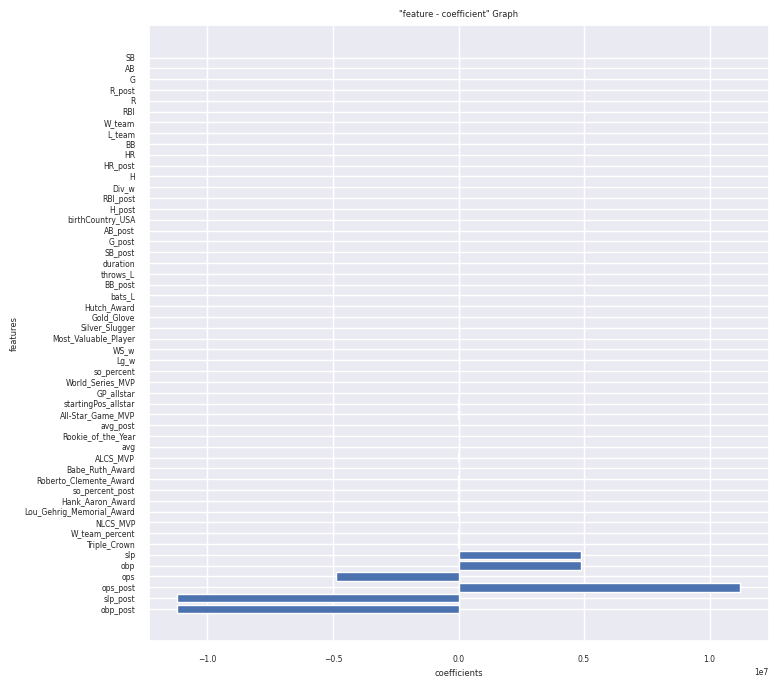

In [ ]:
### coefficients 를 시각화 합니다.

### figure size
plt.figure(figsize = (8, 8))
sns.set(font_scale = 0.5)
### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그릴 수 있습니다.
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

- 유의성 검정을 합니다 (통계에서 변수가 유의하다는 의미입니다).


- X=sm.add_constant(X)
- modeling
        - model = sm.OLS(y,X)
        - result = model.fit()
        - print(results.summary())

In [ ]:
## https://stackoverflow.com/questions/68463220/pandas-importing-error-importerror-cannot-import-name-dtypearg-from-pandas

In [ ]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다.
### 상수항이 추간된 독립변수와 그에 대한 y 값으로 학습을 합니다.
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              candidate   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     148.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:17:28   Log-Likelihood:                 1212.4
No. Observations:                5271   AIC:                            -2319.
Df Residuals:                    5218   BIC:                            -1971.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0794      0.033      2.394      0.017       0.014       0.144
avg                           0.0765      0.086      0.885      0.376      -0.093       0.246
obp                        4.871e+06   5.73e+06      0.850      0.396   -6.37e+06    1.61e+07
slp                        4.871e+06   5.73e+06      0.850      0.396   -6.37e+06    1.61e+07
ops                       -4.871e+06   5.73e+06     -0.850      0.396   -1.61e+07    6.37e+06
so_percent                    0.0345      0.024      1.466      0.143      -0.012       0.081
G                            -0.0001   5.64e-05     -1.902      0.057      -0.000    3.29e-06
AB                        -3.692e-05   2.57e-05     -1.434      0.152   -8.74e-05    1.36e-05
R                            -0.0001      0.000     -1.321      0.186      -0.000    6.51e-05
H                             0.0004   9.68e-05      4.258      0.000       0.000       0.001
HR                            0.0004      0.000      1.965      0.049    7.92e-07       0.001
RBI                           0.0001   8.56e-05      1.682      0.093   -2.39e-05       0.000
SB                        -3.099e-05   9.14e-05     -0.339      0.735      -0.000       0.000
BB                            0.0003    4.8e-05      5.953      0.000       0.000       0.000
W_team                        0.0002   5.17e-05      3.681      0.000    8.89e-05       0.000
L_team                       -0.0003   4.86e-05     -5.258      0.000      -0.000      -0.000
W_team_percent               -0.1576      0.064     -2.476      0.013      -0.282      -0.033
Div_w                         0.0008      0.003      0.251      0.802      -0.006       0.007
Lg_w                          0.0300      0.006      5.310      0.000       0.019       0.041
WS_w                         -0.0258      0.007     -3.719      0.000      -0.039      -0.012
avg_post                      0.0614      0.071      0.869      0.385      -0.077       0.200
obp_post                  -1.123e+07   1.29e+07     -0.872      0.383   -3.65e+07     1.4e+07
slp_post                  -1.123e+07   1.29e+07     -0.872      0.383   -3.65e+07     1.4e+07
ops_post                   1.123e+07   1.29e+07      0.872      0.383    -1.4e+07    3.65e+07
so_percent_post              -0.0846      0.022     -3.861      0.000      -0.128      -0.042
G_post                       -0.0035      0.002     -1.812      0.070      -0.007       0.000
AB_post                       0.0027      0.001      3.389      0.001       0.001       0.004
R_post                        0.0001      0.003      0.039      0.969      -0.005       0.006
H_post                       -0.0020      0.002     -0.923      0.356      -0.006       0.002
HR_post                       0.0004      0.006      0.062      0.951      

In [ ]:
##!pip install pandas==1.3.0
##!pip install --force-reinstall pandas

In [ ]:
## https://stackoverflow.com/questions/71106940/cannot-import-name-centered-from-scipy-signal-signaltools

In [ ]:
##!pip install statsmodels --upgrade

In [ ]:
import statsmodels.api as sm
## import scipy.signal.signaltools as sm

X_train2 = sm.add_constant(X_train)
### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다.
### 상수항이 추간된 독립변수와 그에 대한 y 값으로 학습을 합니다.
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              candidate   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     148.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:17:50   Log-Likelihood:                 1212.4
No. Observations:                5271   AIC:                            -2319.
Df Residuals:                    5218   BIC:                            -1971.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0794      0.033      2.394      0.017       0.014       0.144
avg                           0.0765      0.086      0.885      0.376      -0.093       0.246
obp                        4.871e+06   5.73e+06      0.850      0.396   -6.37e+06    1.61e+07
slp                        4.871e+06   5.73e+06      0.850      0.396   -6.37e+06    1.61e+07
ops                       -4.871e+06   5.73e+06     -0.850      0.396   -1.61e+07    6.37e+06
so_percent                    0.0345      0.024      1.466      0.143      -0.012       0.081
G                            -0.0001   5.64e-05     -1.902      0.057      -0.000    3.29e-06
AB                        -3.692e-05   2.57e-05     -1.434      0.152   -8.74e-05    1.36e-05
R                            -0.0001      0.000     -1.321      0.186      -0.000    6.51e-05
H                             0.0004   9.68e-05      4.258      0.000       0.000       0.001
HR                            0.0004      0.000      1.965      0.049    7.92e-07       0.001
RBI                           0.0001   8.56e-05      1.682      0.093   -2.39e-05       0.000
SB                        -3.099e-05   9.14e-05     -0.339      0.735      -0.000       0.000
BB                            0.0003    4.8e-05      5.953      0.000       0.000       0.000
W_team                        0.0002   5.17e-05      3.681      0.000    8.89e-05       0.000
L_team                       -0.0003   4.86e-05     -5.258      0.000      -0.000      -0.000
W_team_percent               -0.1576      0.064     -2.476      0.013      -0.282      -0.033
Div_w                         0.0008      0.003      0.251      0.802      -0.006       0.007
Lg_w                          0.0300      0.006      5.310      0.000       0.019       0.041
WS_w                         -0.0258      0.007     -3.719      0.000      -0.039      -0.012
avg_post                      0.0614      0.071      0.869      0.385      -0.077       0.200
obp_post                  -1.123e+07   1.29e+07     -0.872      0.383   -3.65e+07     1.4e+07
slp_post                  -1.123e+07   1.29e+07     -0.872      0.383   -3.65e+07     1.4e+07
ops_post                   1.123e+07   1.29e+07      0.872      0.383    -1.4e+07    3.65e+07
so_percent_post              -0.0846      0.022     -3.861      0.000      -0.128      -0.042
G_post                       -0.0035      0.002     -1.812      0.070      -0.007       0.000
AB_post                       0.0027      0.001      3.389      0.001       0.001       0.004
R_post                        0.0001      0.003      0.039      0.969      -0.005       0.006
H_post                       -0.0020      0.002     -0.923      0.356      -0.006       0.002
HR_post                       0.0004      0.006      0.062      0.951      

In [ ]:
### 해설) coeff를 봐야 합니다.
### P>|t|를 봐야 합니다. p-value를 의미한다. 0.05 보다 작아야 유의하다!!
### R-squre 를 봐야 합니다. 설명력을 의미합니다.

##### |기억하기|

- 결정 계수 (coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도이다.
    - 종속 변수의 변동량 중에서 적용한 모형으로 설명 가능한 부분의 비율을 가리킨다.
    - 결정계수의 통상적인 기호는 R²이다.
    - 일반적으로 모형의 설명력으로 해석되지만 모형에 설명 변수가 들어갈수록 증가하기 때문에 해석에 주의해야 한다.
    - 결정계수의 값은 0에서 1 사이에 있으며, 종속 변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워진다.
    - 즉, 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 할 수 있다.

##### | 해석하기 |

1. "INDUS"(상업적 비즈니스에 활용되지 않는 농지 면적: p-value: 0.747)과 “AGE”(1940년 이전에 건설된 비율: p-value:0.771)은 유의하지 않습니다. (p value > 0.05)

2. 주택 가격에 Positive(coefficient > 0)한 영향을 미칩니다.
- "ZN"(25,000 제곱 피트(sq.ft) 이상의 주택지 비율),
- "CHAS"(Charles 강과 접하고 있는지 여부),
- "RM"(자택당 평균 방 갯수),
- "RAD"(소속 도시가 Radial 고속도로와의 접근성 지수),
- "B"(흑인 지수)는
: 다른 변수의 값이 고정했을 때, 해당 변수의 값이 클수록 주택의 가격이 높을 것입니다.

3. 주택 가격에 Negative(coefficient < 0)한 영향을 미칩니다.
- "CRIM"(지역 범죄율),
- "NOX"(산화질소 농도),
- "DIS"(보스턴 고용 센터와의 거리),
- "TAX"(재산세),
- "PTRATIO"(학생-교사 비율),
- "LSTAT"(빈곤층 비율)은
:다른 변수의 값이 고정했을 때, 해당 변수의 값이 작을수록 주택의 가격이 높을 것입니다.

#### 3-4 모델 에측 결과 및 성능 평가
- 예측 결과를 가시화 합니다  

학습한 모델을 Test set에 적용하여 y값(“CMEDV”)을 예측합니다.

예측 결과를 확인하기 위해 실제값과 예측값을 한 plot에 출력해 시각화해보겠습니다.

In [ ]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [ ]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

### reset_index() : 아무래도 데이터프레임의 다양한 전처리 과정을 거치게 되면 인덱스가 뒤죽박죽인 경우가 많다. 이럴때 인덱스를 다시 처음부터 재배열 해주는 유용한 함수다.
### drop=True옵션을 주면 기존 인덱스를 버리고 재배열해준다.
### https://yganalyst.github.io/data_handling/Pd_2/

,actual,prediction
0,0,0.359782
1,0,-0.013913
2,0,-0.017945
3,0,-0.024154
4,0,-0.047696


In [ ]:
df.tail(20)

,actual,prediction
1298,1,0.922426
1299,1,0.548445
1300,1,0.776042
1301,1,1.176802
1302,1,0.715710
1303,1,0.796780
1304,1,1.069194
1305,1,1.212218
1306,1,0.844729
1307,1,0.063274


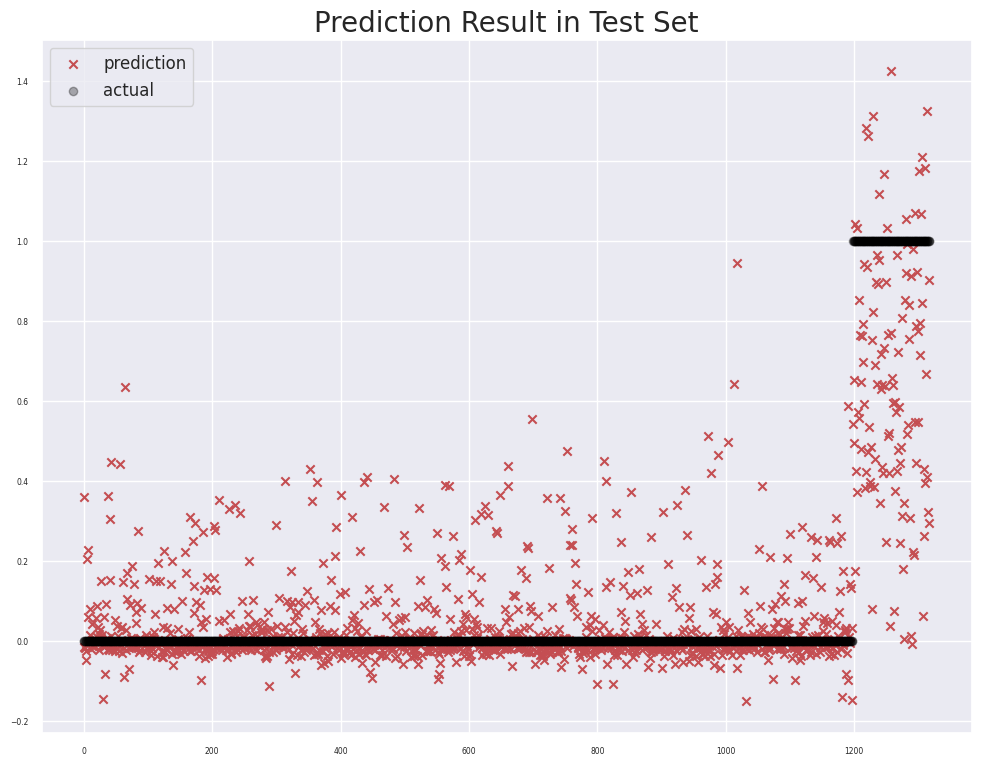

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()
### x축은 집 index, y축이 집값

- 모델 성능 평가 (R squre 와 RMSE)

In [ ]:
### R square
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.5967172693850731
0.6134767374932952


In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set

print(sqrt(mean_squared_error(y_test, pred_test)))

0.19225214161297602
0.17885102773935807


In [ ]:
### 해설) Test set에서 해당 예측 모델의 R square가 0.76이고, RMSE가 4.83입니다.